## **PRODIGY_DS_03**

***Import Dependencies***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn import preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

***Load Data***

In [ ]:
bank = pd.read_csv('bank.csv',delimiter=";")

***Data Exploration***

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bank = bank.rename(columns={'y':'Subsciption'})

In [ ]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subsciption
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


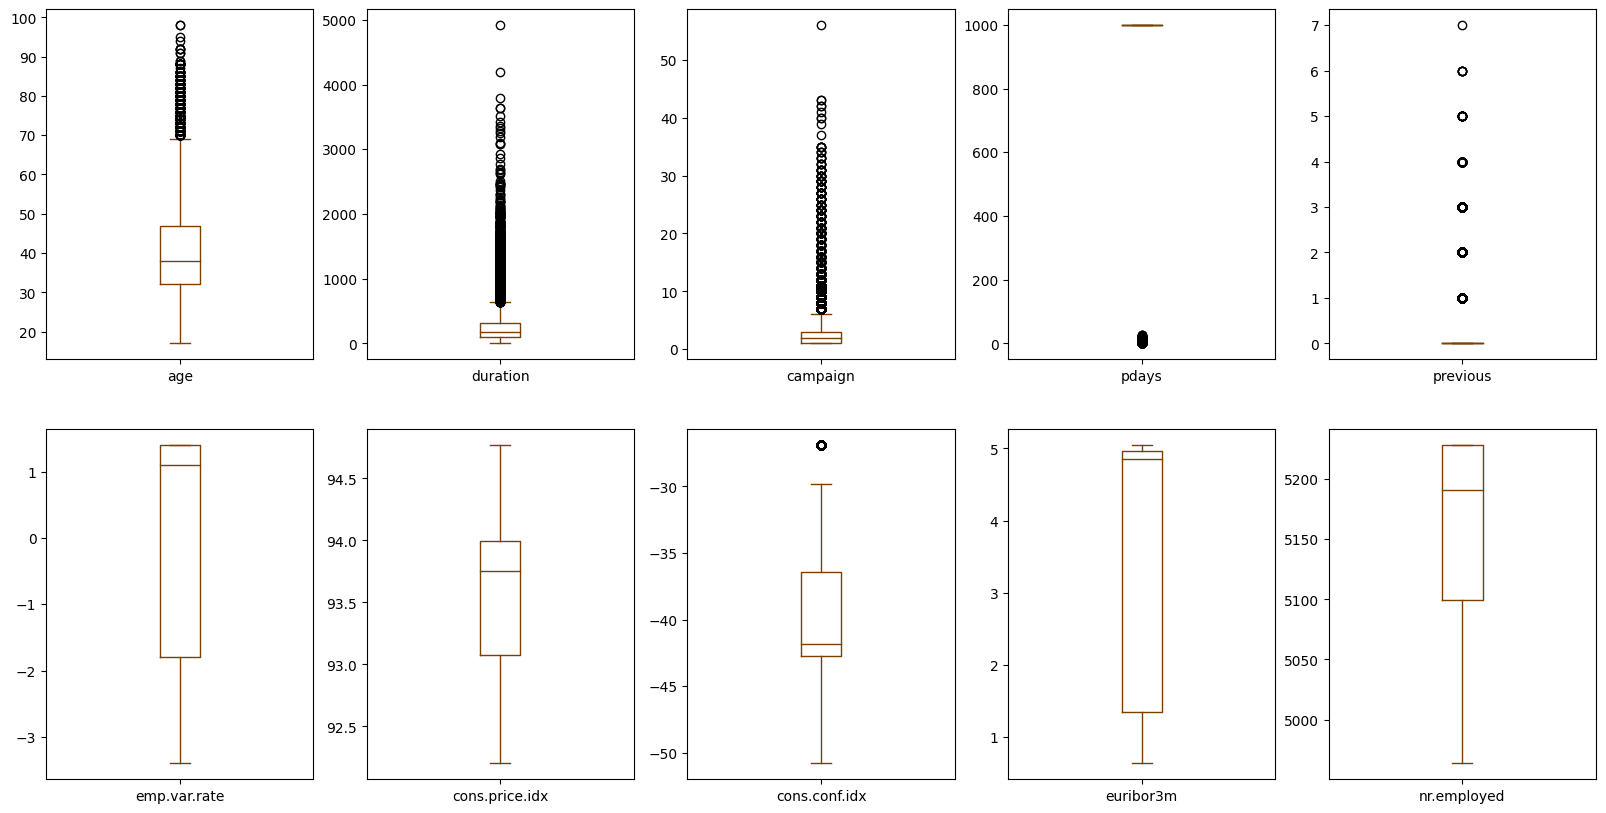

In [ ]:
bank.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

***Label Encoding***

In [ ]:
labels = prep.LabelEncoder()

In [ ]:
bank['Subsciption'] = labels.fit_transform(bank['Subsciption'])
bank['Subsciption'].unique()

array([0, 1])

In [ ]:
bank['marital'] = labels.fit_transform(bank['marital'])
bank['marital'].unique()

array([1, 2, 0, 3])

In [ ]:
bank['education'] = labels.fit_transform(bank['education'])
bank['education'].unique()

array([0, 3, 1, 2, 5, 7, 6, 4])

In [ ]:
bank['job'] = labels.fit_transform(bank['job'])
bank['job'].unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [ ]:
bank['contact'] = labels.fit_transform(bank['contact'])
bank['contact'].unique()

array([1, 0])

In [ ]:
bank['loan'] = labels.fit_transform(bank['loan'])
bank['loan'].unique()

array([0, 2, 1])

In [ ]:
bank['housing'] = labels.fit_transform(bank['housing'])
bank['housing'].unique()

array([0, 2, 1])

In [ ]:
bank['default'] = labels.fit_transform(bank['default'])
bank['default'].unique()

array([0, 1, 2])

In [ ]:
bank['poutcome'] = labels.fit_transform(bank['poutcome'])
bank['poutcome'].unique()

array([1, 0, 2])

In [ ]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subsciption
0,56,3,1,0,0,0,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,may,mon,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
bank.drop(['month','day_of_week'],axis=1,inplace=True)

KeyError: "['month', 'day_of_week'] not found in axis"

In [ ]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subsciption
0,56,3,1,0,0,0,0,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


***Checking Correlation***

<Axes: >

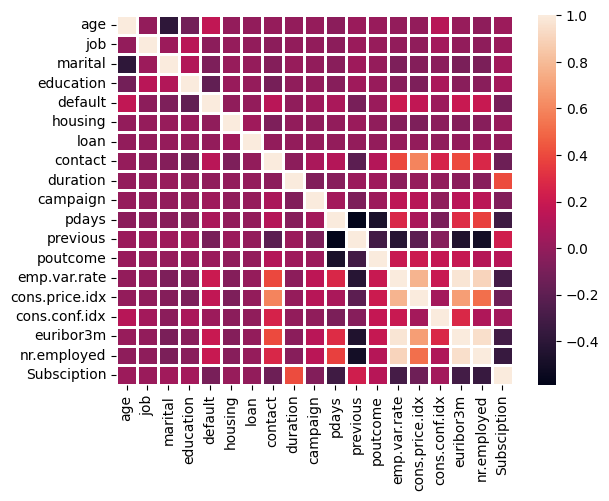

In [ ]:
sns.heatmap(bank.corr(),linewidth=1.0,linecolor='white')

***Model Building***

In [ ]:
x = bank.drop(['Subsciption'], axis=1).values
y = bank['Subsciption'].values

In [ ]:
x.shape

(41188, 18)

In [ ]:
y.shape

(41188,)

***Split Data***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(28831, 18)

In [ ]:
y_train.shape

(28831,)

***Data Scaling***

In [ ]:
scalar = MinMaxScaler()

In [ ]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
x_test.shape

(12357, 18)

***Decision Tree***

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

***Accuracy***

In [ ]:
print("Training score:  ", round(dt.score(x_train, y_train)*100,2))
print("Testing score:  ", round(dt.score(x_test, y_test)*100,2))

Training score:   100.0
Testing score:   88.8


***Cross Validation***

In [ ]:
print("Training cross val score:  ", round(((cross_val_score(dt, x_train, y_train)).mean())*100,2))
print("Testing cross val score:  ", round(((cross_val_score(dt, x_test, y_test)).mean())*100,2))

Training cross val score:   88.92
Testing cross val score:   88.78


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8902646273367322
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.51      0.52      0.52      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

Confusion Matrix:
 [[10275   693]
 [  663   726]]
